<a href="https://colab.research.google.com/github/jrandrade07/Mackenzie_Tarefas/blob/main/DLPLV_Tarefa_Trilha2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando as bibliotecas

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras

from keras.utils.vis_utils import plot_model

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten

#Carregando os dados

In [2]:
X = pd.read_csv("https://raw.githubusercontent.com/jrandrade07/DataSets/main/OSI_feats_e3.csv")
y = pd.read_csv("https://raw.githubusercontent.com/jrandrade07/DataSets/main/OSI_target_e2.csv")

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  is_weekend                     12330 non-null  int64  
 11  VisitorType_New_Visitor        12330 non-null  int64  
 12  VisitorType_Returning_Visitor  12330 non-null 

In [4]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Revenue  12330 non-null  int64
dtypes: int64(1)
memory usage: 96.5 KB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Criando o Modelo Sequencial

In [6]:
from keras.models import Sequential

In [7]:
model = Sequential()
model.add(Dense(4, input_dim=1))
model.add(Dense(1))

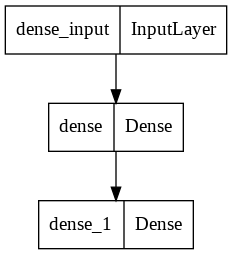

In [8]:
plot_model(model)

# Ajustando o Modelo

In [9]:
# 2. Definir o modelo
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                828       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________


# Copilando o modelo

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ajustando o modelo aos dados

In [12]:
model.fit(X, y, epochs=50, batch_size=10)

Epoch 1/50
1233/1233 [==============================] - 3s 2ms/step - loss: 4.9621 - accuracy: 0.8112
Epoch 2/50
1233/1233 [==============================] - 3s 2ms/step - loss: 0.3919 - accuracy: 0.8729
Epoch 3/50
1233/1233 [==============================] - 3s 2ms/step - loss: 0.3480 - accuracy: 0.8779
Epoch 4/50
1233/1233 [==============================] - 3s 2ms/step - loss: 0.3297 - accuracy: 0.8771
Epoch 5/50
1233/1233 [==============================] - 4s 3ms/step - loss: 0.3364 - accuracy: 0.8773
Epoch 6/50
1233/1233 [==============================] - 3s 3ms/step - loss: 0.3179 - accuracy: 0.8761
Epoch 7/50
1233/1233 [==============================] - 1s 1ms/step - loss: 0.3164 - accuracy: 0.8782
Epoch 8/50
1233/1233 [==============================] - 1s 1ms/step - loss: 0.3072 - accuracy: 0.8796
Epoch 9/50
1233/1233 [==============================] - 1s 1ms/step - loss: 0.3055 - accuracy: 0.8787
Epoch 10/50
1233/1233 [==============================] - 1s 1ms/step - loss: 0.295

# Avaliando o modelo 

In [13]:
_, accuracy = model.evaluate(X, y)
print('Acurácia: %.2f' % (accuracy*100))

386/386 [==============================] - 1s 982us/step - loss: 0.2396 - accuracy: 0.8966
Acurácia: 89.66


# Avaliando o loss no conjunto de teste

In [14]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=10)
print('loss: %.2f' % (loss*100))

370/370 [==============================] - 1s 1ms/step - loss: 0.2499 - accuracy: 0.8889
loss: 24.99
